#Group 4
###Member 1 : Shemonto Das(MUN ID -202193149)
###Member 2 : (Mohammad Shehabul Islam - 202196528)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housedata.csv to housedata (2).csv


### Imports

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer

###**Part 1 - Data Presentation**

In [ ]:
# read the dataset
df = pd.read_csv('housedata.csv')
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
#Checking the shape
df.shape

(13320, 9)

In [ ]:
# checking the columns
df.columns 

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
#attributes descriptor
df['area_type'].describe() 
# following attribute has 13320 values with 4 unique values and a particular frequency

count                    13320
unique                       4
top       Super built-up  Area
freq                      8790
Name: area_type, dtype: object

In [ ]:
#attributes descriptor
df['size'].describe() 
# following attribute has 13304 values with 31 unique values and a particular frequency

count     13304
unique       31
top       2 BHK
freq       5199
Name: size, dtype: object

In [ ]:
#attributes descriptor
df['total_sqft'].describe() 
# following attribute has 13320 values with 2117 unique values and a particular frequency

count     13320
unique     2117
top        1200
freq        843
Name: total_sqft, dtype: object

In [ ]:
df.describe()
# following shows the standard deviation, mean, min and max of the attribute bath, balcony and price.The distibution of datas of these attributes are visible  

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


**Area Type**: Area of the Property in which they exist.

**Availibility**: Property's status as in 'ready to move' or 'still under construction'.

**Location**: Name of locality/place.

**Size**: Number of bedrooms along with 1 hall and 1 kitchen.

**Society**: Name of the society.

**Total_sqft**: Area of the property in square feet.

**Bath**: Number of bathrooms.

**Balcony**: Number of Balconies.

**Price**: Price in Indian rupees.




In [ ]:
# Sub plots

### x-axis is representing the number of bath a house has and y-axis represents the count of house.From the plot we can get an idea of number of houses on a particular number of bath. 

Text(0, 0.5, 'Houses')

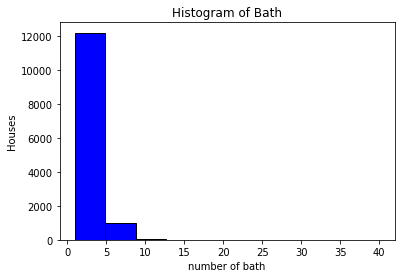

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['bath'], color = 'blue', edgecolor = 'black')
# Add labels
plt.title('Histogram of Bath')
plt.xlabel('number of bath')
plt.ylabel('Houses')

### x-axis is representing the number of balcony a house has and y-axis represents the count of house.From the plot we can get an idea of number of houses on a particular number of balcony. 

Text(0, 0.5, 'Houses')

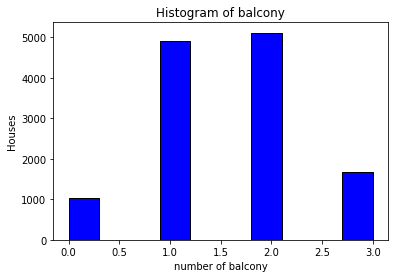

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['balcony'], color = 'blue', edgecolor = 'black')
# Add labels
plt.title('Histogram of balcony')
plt.xlabel('number of balcony')
plt.ylabel('Houses')

#### The plot below shows a size attribute based grouped distribution on the basis of price. x-axis corresponds to the number of bedrooms whereas y-axis represents the corresponding price

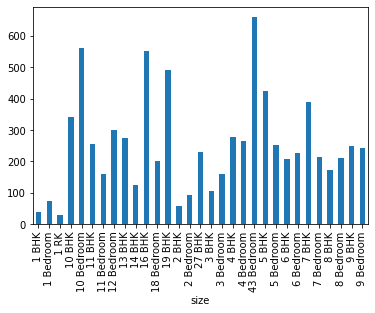

In [ ]:
# Using pandas plot
df.groupby('size').mean()['price'].plot(kind='bar') 
#df.groupby('sex').mean()['tip'].plot(kind='barh')

In [ ]:
# check null value counts per column
df.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
#remove unwanted columns as this will have no effect on our data
df1= df.drop(['society', 'availability'], axis='columns')
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
## check null value counts per column
df1.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
# checking unique values of balcony
df1['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [ ]:
# checking values counts of each balcony
df1.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [ ]:
# null values means no balacony.
df1['balcony'] = df1['balcony'].fillna('0')
df1.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,1
size,16
total_sqft,0
bath,73
balcony,0
price,0


In [ ]:
df1['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [ ]:
#drop other null rows from the data.
df2=df1.dropna()
df2.shape

(13246, 7)

In [ ]:
df2.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df2.head(5)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
# check unique values of each column separately to clean data
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
area_types = list(df2["area_type"])
area_types = set(area_types)
area_types # looks fine

{'Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area'}

In [ ]:
size = list(df2["size"])
size = set(size)
size 
# this needs to be cleaned as datas of this atrribute are not consistent 

{'1 BHK',
 '1 Bedroom',
 '1 RK',
 '10 BHK',
 '10 Bedroom',
 '11 BHK',
 '11 Bedroom',
 '12 Bedroom',
 '13 BHK',
 '14 BHK',
 '16 BHK',
 '18 Bedroom',
 '19 BHK',
 '2 BHK',
 '2 Bedroom',
 '27 BHK',
 '3 BHK',
 '3 Bedroom',
 '4 BHK',
 '4 Bedroom',
 '43 Bedroom',
 '5 BHK',
 '5 Bedroom',
 '6 BHK',
 '6 Bedroom',
 '7 BHK',
 '7 Bedroom',
 '8 BHK',
 '8 Bedroom',
 '9 BHK',
 '9 Bedroom'}

In [ ]:
df3 = df2.copy()
df3.head(5)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df3['rooms/apt'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head(5)

,area_type,location,size,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [ ]:
# checking total_sqft columns for cleaning.

total_sqft = list(df2["total_sqft"])
total_sqft = set(total_sqft)
total_sqft  # we see some values like range such as (929 - 1078)/ 86.72Sq. Meter', which is not in structure.

{'1079 - 1183',
 '3Cents',
 '2247',
 '1379',
 '42000',
 '3067 - 8156',
 '1666',
 '2882',
 '38Guntha',
 '3227',
 '1368',
 '117Sq. Yards',
 '2195',
 '1128',
 '1558',
 '1778',
 '60',
 '1256',
 '1451',
 '943',
 '540',
 '1308',
 '1932',
 '1419.59',
 '1590',
 '4850',
 '1828',
 '2144.6',
 '1634',
 '5720',
 '4408',
 '1092',
 '1852',
 '2185',
 '1171',
 '3204',
 '1795',
 '2360',
 '1736',
 '1309',
 '2225',
 '1985',
 '613 - 648',
 '1269.72',
 '708',
 '1817',
 '1689',
 '1307',
 '315Sq. Yards',
 '854 - 960',
 '1183',
 '1268',
 '1160',
 '1191',
 '858',
 '7800',
 '3027',
 '3729',
 '989',
 '929 - 1078',
 '906',
 '1247',
 '2122',
 '1174',
 '3009',
 '1428',
 '2559',
 '1999',
 '766',
 '1653',
 '2200',
 '4960',
 '1414',
 '4320',
 '8500',
 '753',
 '958',
 '1469 - 1766',
 '799 - 803',
 '1881',
 '1205',
 '2293',
 '2435',
 '1434',
 '1281',
 '1147',
 '1302',
 '302',
 '1212',
 '1229',
 '2160',
 '1265',
 '688',
 '4560',
 '840 - 1010',
 '36000',
 '1107',
 '1789',
 '1557',
 '1455',
 '1723',
 '1285',
 '1300',
 '595'

In [ ]:
# returns a valid number
def float_check(num):
  try:
    float(num)
  except:
    return False
  return True

In [ ]:
df4 = df3.copy()
df4.head()

,area_type,location,size,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [ ]:
df4[~df4['total_sqft'].apply(float_check)].tail(10)

,area_type,location,size,total_sqft,bath,balcony,price,rooms/apt
12544,Super built-up Area,Hebbal,4 BHK,4000 - 4450,6.0,0.0,359.000,4
12560,Super built-up Area,Hosa Road,3 BHK,142.84Sq. Meter,3.0,1.0,110.000,3
12652,Plot Area,Billamaranahalli,2 Bedroom,300Sq. Yards,2.0,2.0,150.000,2
12791,Super built-up Area,Bannerghatta Road,2 BHK,1115 - 1130,2.0,0.0,61.740,2
12955,Super built-up Area,Thanisandra,3 BHK,1437 - 1629,3.0,0.0,75.885,3
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2
13299,Super built-up Area,Whitefield,4 BHK,2830 - 2882,5.0,0.0,154.500,4


In [ ]:
# convert the unstructured total sqft input data to meaningful number
def convert_sqft_to_num(num):
    x = num.split('-')
    if len(x)==2:
        return(float(x[0])+float(x[1]))/2
    try:
        return float(num)
    except:
        return None

In [ ]:
df5 = df4.copy()

In [ ]:
df5['total_sqft'] = df5['total_sqft'].apply(convert_sqft_to_num)
df5.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,0,204.00,4
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,0,600.00,4
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
9,Plot Area,Gandhi Bazar,6 Bedroom,1020.0,6.0,0,370.00,6


In [ ]:
df5.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,0
size,0
total_sqft,46
bath,0
balcony,0
price,0
rooms/apt,0


In [ ]:
bath = list(df2["bath"])
bath = set(bath)
bath 

{1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 18.0,
 27.0,
 40.0}

In [ ]:
df5.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,0
size,0
total_sqft,46
bath,0
balcony,0
price,0
rooms/apt,0


In [ ]:
df6 = df5.copy()
df6 = df6.dropna()
df6.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0
rooms/apt,0


In [ ]:
df6.shape

(13200, 8)

In [ ]:
df7 = df1.copy()

In [ ]:
#spliting in order to have a consistent structure for the values in this attribute
df7['rooms/apt'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df7.head()

,area_type,location,size,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [ ]:
df7[~df7['total_sqft'].apply(float_check)].tail(10)

,area_type,location,size,total_sqft,bath,balcony,price,rooms/apt
12652,Plot Area,Billamaranahalli,2 Bedroom,300Sq. Yards,2.0,2.0,150.000,2.0
12791,Super built-up Area,Bannerghatta Road,2 BHK,1115 - 1130,2.0,0.0,61.740,2.0
12861,Super built-up Area,KR Puram,4 BHK,2204 - 2362,NaN,0,121.000,NaN
12955,Super built-up Area,Thanisandra,3 BHK,1437 - 1629,3.0,0.0,75.885,3.0
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2.0
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3.0
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2.0
13240,Super built-up Area,Devanahalli,1 BHK,1020 - 1130,NaN,0,52.570,NaN
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2.0
13299,Super built-up Area,Whitefield,4 BHK,2830 - 2882,5.0,0.0,154.500,4.0


In [ ]:
# coverting all the values of total_sqft attribute to a consistent structure
df7['total_sqft'] = df7['total_sqft'].apply(convert_sqft_to_num)

In [ ]:
df7.head()

,area_type,location,size,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0


In [ ]:
df7.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,1
size,16
total_sqft,46
bath,73
balcony,0
price,0
rooms/apt,74


In [ ]:
df7 = df7.drop(['size'], axis=1)
df7.head()

,area_type,location,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0


In [ ]:
df7.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,1
total_sqft,46
bath,73
balcony,0
price,0
rooms/apt,74


In [ ]:
df7['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [ ]:
df7.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,1
total_sqft,46
bath,73
balcony,0
price,0
rooms/apt,74


### **Part 2 - Data Scaling**


In [ ]:
df4_p2 = df6.copy()
df4_p2 = df4_p2.drop(['size','price'],axis=1)
df4_p2.head()

,area_type,location,total_sqft,bath,balcony,rooms/apt
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,2


In [ ]:
df5_p2 = df4_p2.apply(lambda x: pd.to_numeric(x, errors='coerce'))

#### We have choosen 3 data scaling techniques(MinMax,MaxAbs, Quantile) and are testing them to see their effects on our data that will be used to train the model. 
#### After ploting we see a clear difference between orginal and scaled data. We also see that Quantile data scaler has change most of the attributes distribution.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/

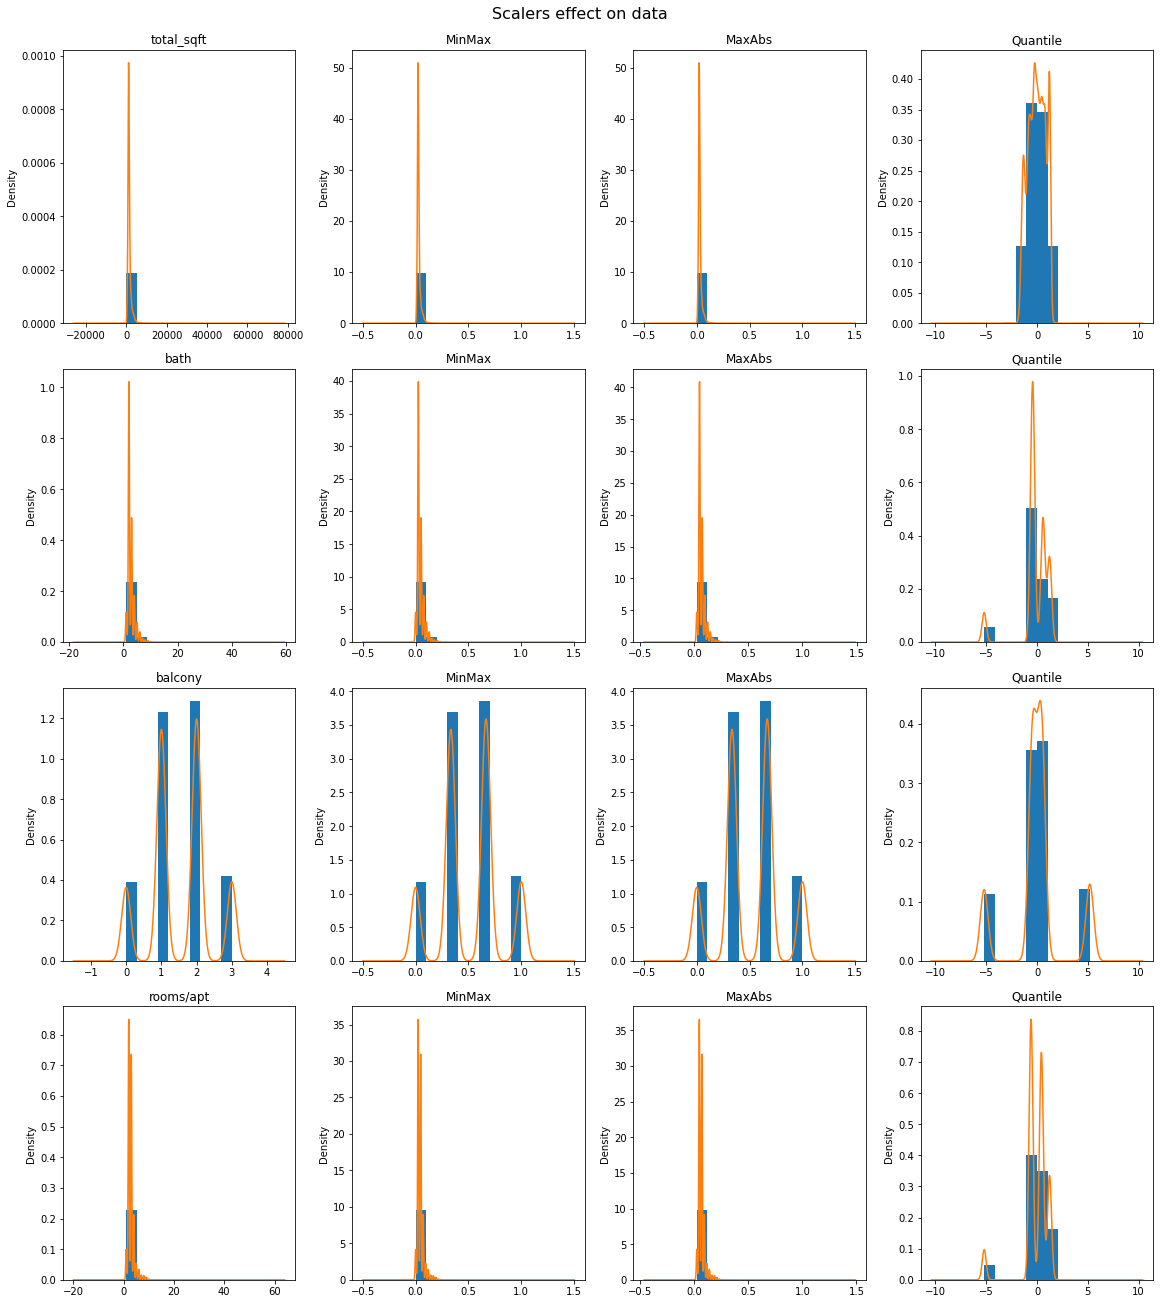

In [ ]:
def plot_histograms_density_for_scalers(df_gain, columns, fig_title, scalers, scaler_names):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df_gain[c].hist(ax=axs[i], density=True) # normalizes the density
        df_gain[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            #df1 = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
            df_transformed = scalers[j].fit_transform(df_gain)
            df_transformed = pd.DataFrame(df_transformed, index=df_gain.index, columns=df_gain.columns)
            #df_transformed = df_transformed.combine_first(df)
            df_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density nto supported betwn float and string
            df_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1
            

val_cols_names = ['total_sqft','bath','balcony','rooms/apt']
scaler_names = ['MinMax', 'MaxAbs', 'Quantile']
arr_scalers = [MinMaxScaler(), MaxAbsScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
plot_histograms_density_for_scalers(df5_p2, val_cols_names, 'Scalers effect on data', arr_scalers, scaler_names)

### **Part 3 - Handling missing data and outliers**

#### Exploring how each column is distributed in a way we can assess the best centrality measures to be applied to the column.  

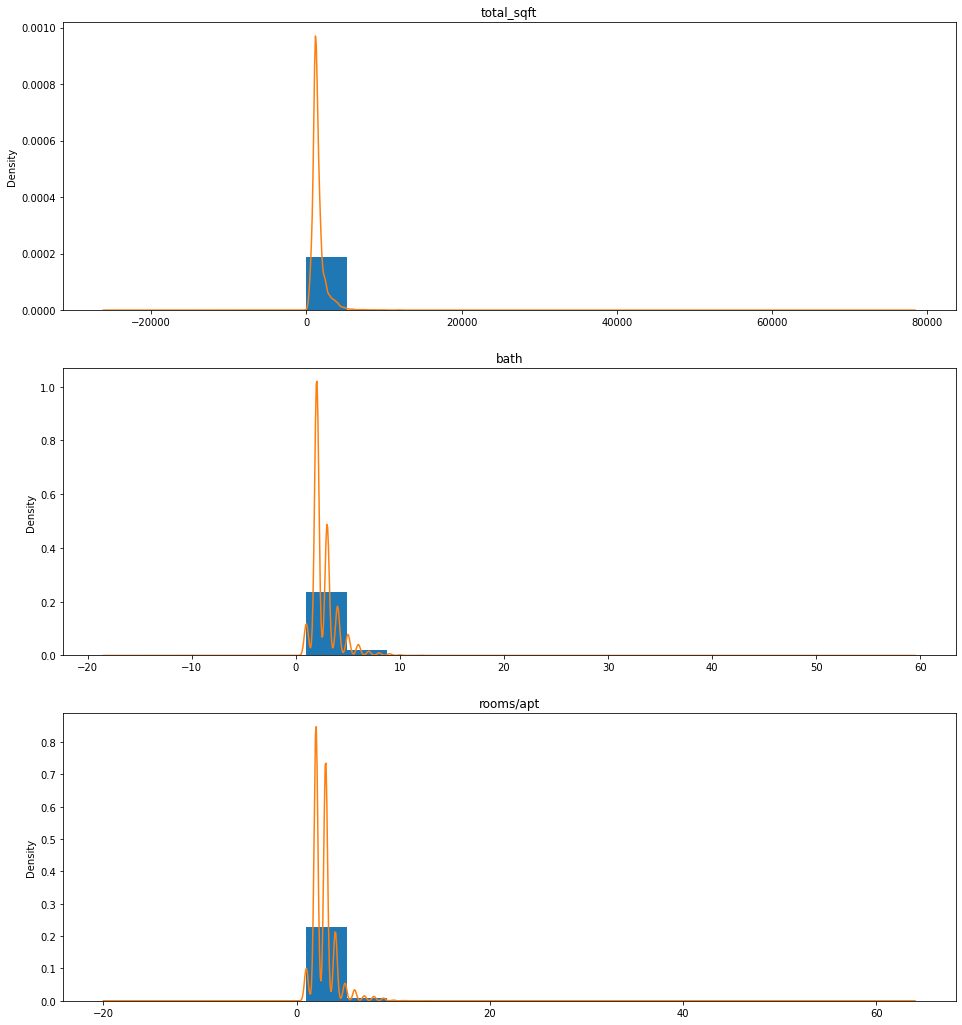

In [ ]:
val_cols_names = ['total_sqft','bath', 'rooms/apt']

def plot_histograms_density(df, columns):
    fig, axs = plt.subplots(len(columns),1,figsize=(16,18))
    i = 0
    for c in columns:
        df7[c].hist(ax=axs[i], density=True) #normalizes the density
        df7[c].plot.density(ax=axs[i], title=c)
        i+=1
plot_histograms_density(df7, val_cols_names)



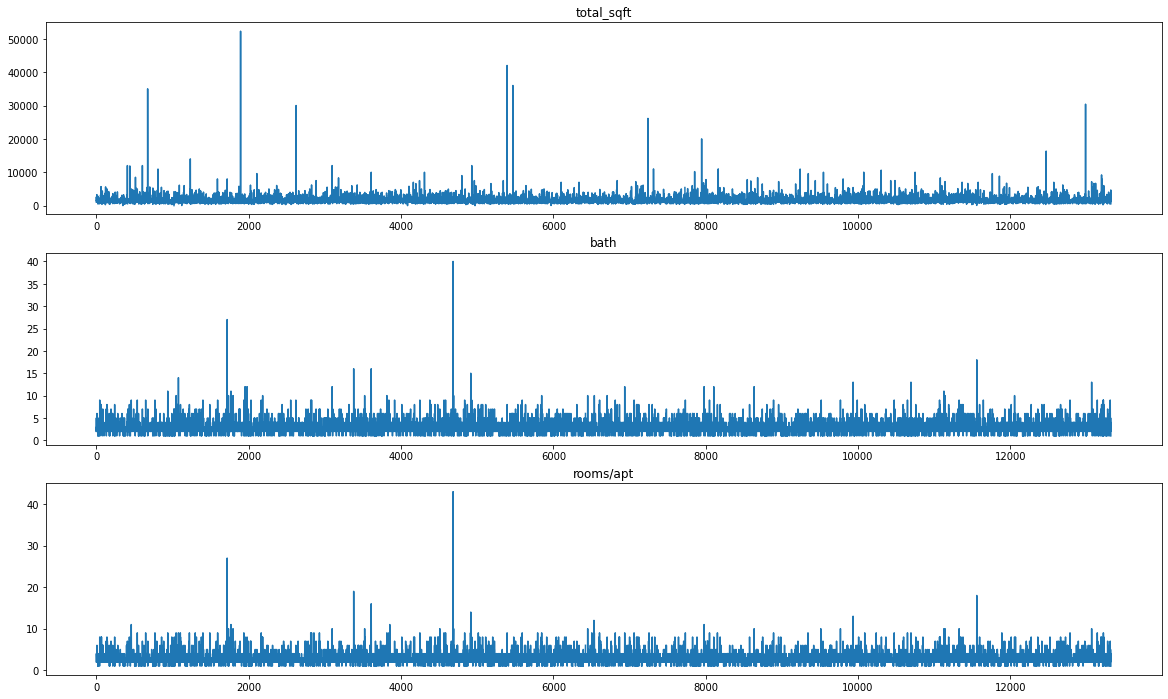

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,1, figsize=(20,12))

df7['total_sqft'].plot(ax=axs[0], title='total_sqft', xlabel='')
df7['bath'].plot(ax=axs[1], title='bath', xlabel='')
df7['rooms/apt'].plot(ax=axs[2], title='rooms/apt', xlabel='')

We can see that after filling the missing data using 'ffill' method, it is hard to interpret the difference from the data because of the amount of instance in the data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13200 non-null  object 
 1   location    13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   balcony     13200 non-null  object 
 5   price       13200 non-null  float64
 6   rooms/apt   13200 non-null  float64
dtypes: float64(4), object(3)
memory usage: 825.0+ KB
None


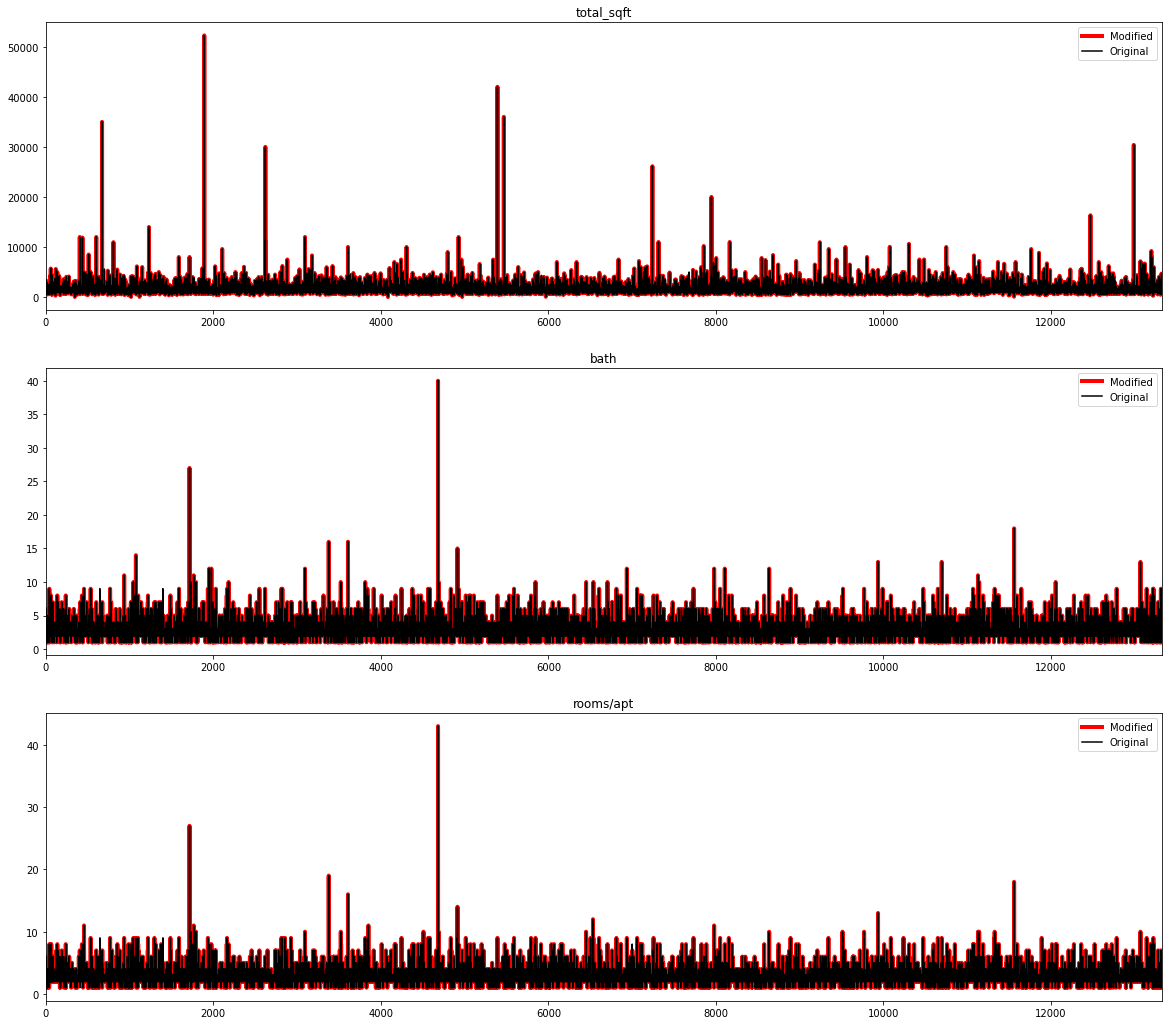

In [ ]:
# let's create a function to plot the data side by side, the original dataframe and the one with
# the results of the methods we are applying to it

def plot_series_side_by_side(original, resulting, columns):
    fig, axs = plt.subplots(len(columns),1,figsize=(20,18))
    axs = axs.flatten()
    custom_xlim = (original.index.min(), original.index.max())
    i = 0
    for c in columns:
        resulting[c].plot(ax=axs[i], title=c, xlabel='', xlim=custom_xlim, label='Modified', lw=4, color='red')
        original[c].plot(ax=axs[i], title=c, xlabel='', xlim=custom_xlim, label='Original', color='black')
        axs[i].legend()
        i+=1

drop_df = df7.copy() #we copy here to see the effects of the removals
drop_df = drop_df.dropna()


drop_df = drop_df.fillna(method='ffill') 
print(drop_df.info())
plot_series_side_by_side(df7, drop_df,val_cols_names)

In [ ]:
# drop_df.isna().sum().to_frame(name='missing data')
df7.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,1
total_sqft,46
bath,73
balcony,0
price,0
rooms/apt,74


In [ ]:
df8 = df7.copy()
df8.head()

,area_type,location,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0


Text(0, 0.5, 'Count')

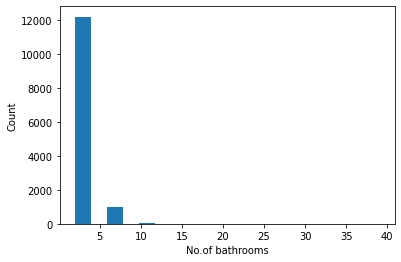

In [ ]:
plt.hist(df8.bath, rwidth=0.5)
plt.xlabel('No.of bathrooms')
plt.ylabel('Count')

In [ ]:
 # Outliers
 df8[df8.bath>10].value_counts().to_frame(name='Outliers')

Outliers
area_type            location                      total_sqft bath balcony price  rooms/apt          
Plot  Area           1 Ramamurthy Nagar            1200.0     11.0 0.0     170.0  11.0              1
                     1Kasavanhalli                 1200.0     18.0 0       200.0  18.0              1
Super built-up  Area Koramangala Industrial Layout 10000.0    16.0 0       550.0  16.0              1
                     Jp nagar 8th Phase .          12000.0    12.0 0       525.0  10.0              1
                     2Electronic City Phase II     8000.0     27.0 0.0     230.0  27.0              1
                     1Hoysalanagar                 5425.0     13.0 0.0     275.0  13.0              1
                     1Hanuman Nagar                2000.0     16.0 0       490.0  19.0              1
                     1Channasandra                 1250.0     15.0 0.0     125.0  14.0              1
                     1 Immadihalli                 6000.0     12.0 0       150.0  11.0              1
Plot  Area           Wilson Garden                 1850.0     12.0 0       300.0  8.0               1
                     Munnekollal                   2400.0     40.0 0.0     660.0  43.0              1
                     KR Puram                      1200.0     12.0 0       110.0  8.0               1
                     Jigani                        1200.0     11.0 0       105.0  10.0              1
                     Hongasandra                   990.0      12.0 0.0     120.0  8.0               1
                     Electronic City               1200.0     13.0 0       150.0  9.0               1
                     Defence Colony                7150.0     13.0 0       3600.0 10.0              1
                     BTM 1st Stage                 3300.0     14.0 0       500.0  9.0               1
                     5th Phase JP Nagar            1260.0     11.0 0       290.0  9.0               1
                     5th Block Hbr Layout          2600.0     12.0 0       675.0  9.0               1
Super built-up  Area Neeladri Nagar                4000.0     12.0 0       160.0  10.0              1

In [ ]:
df8['rooms/apt']

0        2.0
1        4.0
2        3.0
3        3.0
4        2.0
        ... 
13315    5.0
13316    4.0
13317    2.0
13318    4.0
13319    1.0
Name: rooms/apt, Length: 13320, dtype: float64

In [ ]:
df8[df8['bath'] > df8['rooms/apt']+1].head(5)

,area_type,location,total_sqft,bath,balcony,price,rooms/apt
84,Super built-up Area,EPIP Zone,1499.0,5.0,2.0,102.0,3.0
209,Plot Area,Padmanabhanagar,1736.0,6.0,0.0,190.0,4.0
337,Super built-up Area,Thigalarapalya,3122.0,6.0,2.0,230.0,4.0
490,Super built-up Area,Old Madras Road,4500.0,7.0,3.0,337.0,5.0
524,Super built-up Area,Jakkur,5230.0,6.0,1.0,465.0,4.0


In [ ]:
df8.shape

(13320, 7)

In [ ]:
df9 = df8.copy()
df9 = df9[df9['bath'] < df9['rooms/apt']+1]
df9.shape

(12340, 7)

In [ ]:
df9.head()

,area_type,location,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2.0


In [ ]:
df9.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,0
total_sqft,40
bath,0
balcony,0
price,0
rooms/apt,0


In [ ]:
df9.shape

(12340, 7)

In [ ]:
df9.head()

,area_type,location,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2.0


In [ ]:
# df10 = df7.apply(lambda x: pd.to_numeric(x, errors='coerce'))
# df10 = df10.drop(['price'], axis=1)
# df10.shape

In [ ]:
# df11 = df7.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df11 = df7.drop(['area_type','location','price'], axis=1)
df11['total_sqft'].fillna('0',inplace=True)
df11['bath'].fillna('0',inplace=True)
df11['rooms/apt'].fillna('0',inplace=True)
# df11.fillna(0,inplace=True)
df12 = df11.copy()
df12.head()

,total_sqft,bath,balcony,rooms/apt
0,1056.0,2.0,1.0,2.0
1,2600.0,5.0,3.0,4.0
2,1440.0,2.0,3.0,3.0
3,1521.0,3.0,1.0,3.0
4,1200.0,2.0,1.0,2.0


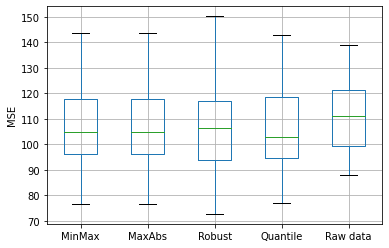

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


scaler_names = ['MinMax', 'MaxAbs', 'Robust', 'Quantile']
arr_scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results = {}
# model = LinearRegression()
model = KNeighborsRegressor(n_neighbors=3)

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df12.to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is NOX that we want to forecast
    y = df7['price'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    results[scaler_names[i]] = [abs(elem) for elem in scores]


cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
results['Raw data'] = [abs(elem) for elem in scores]

df_res = pd.DataFrame(results)
boxplot = df_res.boxplot() 
boxplot.set_ylabel('MSE')
plt.show()


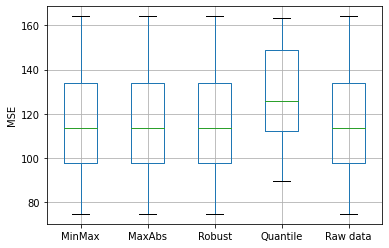

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


scaler_names = ['MinMax', 'MaxAbs', 'Robust', 'Quantile']
arr_scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results = {}
model = LinearRegression()
# model = KNeighborsRegressor(n_neighbors=3)

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df12.to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is NOX that we want to forecast
    y = df7['price'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    results[scaler_names[i]] = [abs(elem) for elem in scores]


cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
results['Raw data'] = [abs(elem) for elem in scores]

df_res = pd.DataFrame(results)
boxplot = df_res.boxplot() 
boxplot.set_ylabel('MSE')
plt.show()


As we can see from the plots below, the scalers in Linear model produced a higher variance and slightly reduced performance than that of KNN scalers. Whereas, all the KNN scalers produced least amount of variance and a balanced accuracy. Although all the scalers for KNN provided almost the same variance, out of those Quantile Transformer scaler for KNN has the better results in terms of MSE. Hence we can say KNN with Quantile Transformer is the best combination for the below box plots.

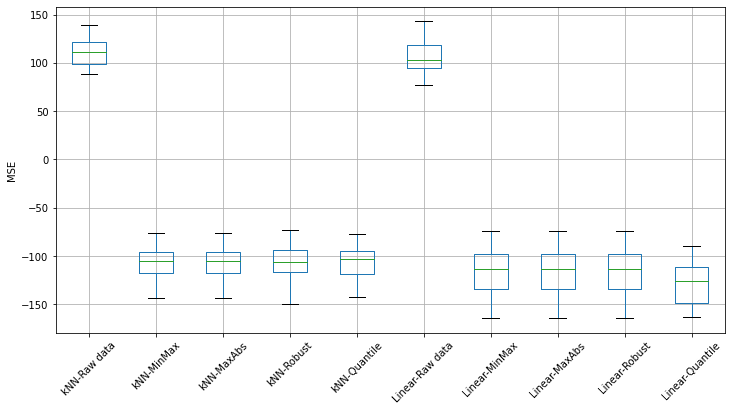

In [ ]:
from sklearn import linear_model


from sklearn.metrics import mean_squared_error

knn_model = KNeighborsRegressor(n_neighbors=3) 
linear_model = LinearRegression()

knn_scaler_names = ['kNN-MinMax', 'kNN-MaxAbs', 'kNN-Robust', 'kNN-Quantile']
lin_scaler_names = ['Linear-MinMax', 'Linear-MaxAbs', 'Linear-Robust', 'Linear-Quantile']

arr_scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results = {}


# KNN

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(knn_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
results['kNN-Raw data'] = [abs(elem) for elem in scores]

for i in range(len(arr_scalers)):
    # X is all the other variables
    X = df12.to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is the column that we want to forecast
    y = df7['price'].to_numpy()
    # cross-validation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(knn_model, X_t, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    results[knn_scaler_names[i]] = scores


# Linear Model

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
sgd_scores = cross_val_score(linear_model, X_t, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
results['Linear-Raw data'] = [abs(elem) for elem in scores]

for i in range(len(arr_scalers)):
    # X is all the other variables
    X = df12.to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is the column that we want to forecast
    y = df7['price'].to_numpy()
    # cross-validation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    sgd_scores = cross_val_score(linear_model, X_t, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    results[lin_scaler_names[i]] = sgd_scores

# Plotting the boxplot side by side
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot(rot=45, figsize=(12,6)) 
boxplot.set_ylabel('MSE')
plt.show() 



In [ ]:
df12.head()

,total_sqft,bath,balcony,rooms/apt
0,1056.0,2.0,1.0,2.0
1,2600.0,5.0,3.0,4.0
2,1440.0,2.0,3.0,3.0
3,1521.0,3.0,1.0,3.0
4,1200.0,2.0,1.0,2.0


In [ ]:
# Filled NA values so that data can be fitted

rows_to_fix_reg = df7[df7.isna().any(axis=1)]
rows_to_fix_reg = rows_to_fix_reg.drop(['area_type','location'],axis=1)
rows_to_fix_reg = rows_to_fix_reg.fillna({
    'total_sqft':0,
    'bath':0,
    'rooms/apt':0
})
rows_to_fix_reg

,total_sqft,bath,balcony,price,rooms/apt
56,3210.0,0.0,0,192.00,0.0
81,3203.5,0.0,0,224.50,0.0
224,1630.0,0.0,0,74.82,0.0
344,525.0,0.0,0,21.53,0.0
410,0.0,1.0,0.0,18.50,1.0
...,...,...,...,...,...
12560,0.0,3.0,1.0,110.00,3.0
12652,0.0,2.0,2.0,150.00,2.0
12768,3210.0,0.0,0,353.00,0.0
12861,2283.0,0.0,0,121.00,0.0


In [ ]:
# clean data ekdom kono missing data nai
clean_df_reg = df7.dropna()
clean_df_reg = clean_df_reg.drop(['area_type','location'],axis=1)

In [ ]:
clean_df_reg

,total_sqft,bath,balcony,price,rooms/apt
0,1056.0,2.0,1.0,39.07,2.0
1,2600.0,5.0,3.0,120.00,4.0
2,1440.0,2.0,3.0,62.00,3.0
3,1521.0,3.0,1.0,95.00,3.0
4,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...
13315,3453.0,4.0,0.0,231.00,5.0
13316,3600.0,5.0,0,400.00,4.0
13317,1141.0,2.0,1.0,60.00,2.0
13318,4689.0,4.0,1.0,488.00,4.0


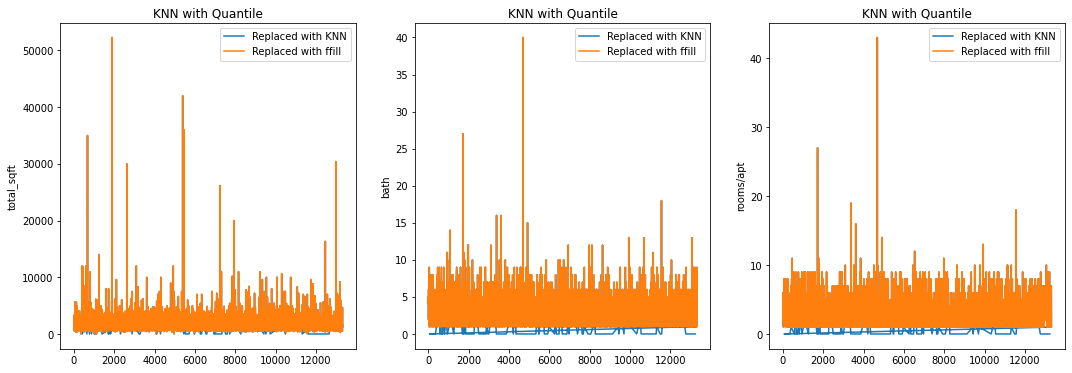

In [ ]:
# KNN
clean_df_reg_knn = clean_df_reg.copy()
rows_to_fix_reg_knn = rows_to_fix_reg.copy()
# The best for KNN was the quantile scaler
X = clean_df_reg_knn.drop(['price'], axis=1).to_numpy()
quantile = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
X_t = quantile.fit_transform(X)
y = clean_df_reg_knn['price'].to_numpy()
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_t, y)
# Now let's use the model to predict the missing rows
X_to_pred = rows_to_fix_reg_knn.drop(['price'], axis=1).to_numpy()
# we need to transform the data in X_to_pred (do not fit, otherwise the scaler will change the ranges)
X_t_to_pred = quantile.transform(X_to_pred)
y_pred = model.predict(X_t_to_pred)
# Let's add to the NaN rows the values predicted
rows_to_fix_reg_knn['price'] = y_pred
# put rows back
df_knn = clean_df_reg.append(rows_to_fix_reg_knn)

# Create the plots
fig, axs = plt.subplots(1,3,figsize=(18,6))
axs = axs.flatten()
df7_p3 = df7_p3.fillna(method='ffill')
# df_lr['price'].plot(ax=axs[0], xlabel='', ylabel='price')
# df['price'].plot(ax=axs[0], title='Linear Regression', xlabel='', legend=True)
# axs[0].legend(["Replaced with LR", "Replaced with ffill"])


df_knn['total_sqft'].plot(ax = axs[0], xlabel='', ylabel='total_sqft')
df7_p3['total_sqft'].plot(ax = axs[0], title='KNN with Quantile', xlabel='', legend=True)
axs[0].legend(["Replaced with KNN", "Replaced with ffill"]);

df_knn['bath'].plot(ax = axs[1], xlabel='', ylabel='bath')
df7_p3['bath'].plot(ax = axs[1], title='KNN with Quantile', xlabel='', legend=True)
axs[1].legend(["Replaced with KNN", "Replaced with ffill"]);

df_knn['rooms/apt'].plot(ax = axs[2], xlabel='', ylabel='rooms/apt')
df7_p3['rooms/apt'].plot(ax = axs[2], title='KNN with Quantile', xlabel='', legend=True)
axs[2].legend(["Replaced with KNN", "Replaced with ffill"]);

In [ ]:
df13 = df7.copy()
df13.head(5)

,area_type,location,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0


In [ ]:
df13.isna().sum().to_frame(name='missing data')

,missing data
area_type,0
location,1
total_sqft,46
bath,73
balcony,0
price,0
rooms/apt,74


# Part 4 - Data Encoding

####Features area_type and location are one to be encoded in our dataset as they are categorical values.

In [ ]:
df13 = df7.copy()
df13 = df13.drop(['total_sqft','balcony','bath','price','rooms/apt'], axis=1)
df13.head(5)

,area_type,location
0,Super built-up Area,Electronic City Phase II
1,Plot Area,Chikka Tirupathi
2,Built-up Area,Uttarahalli
3,Super built-up Area,Lingadheeranahalli
4,Super built-up Area,Kothanur


In [ ]:
df_p4_new = df7.drop(['total_sqft','balcony','bath','location','rooms/apt','area_type'], axis=1)
df_p4_new

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00
...,...
13315,231.00
13316,400.00
13317,60.00
13318,488.00


In [ ]:
df7_p3 = df7.copy()
df7_p3.isna().sum()

area_type      0
location       1
total_sqft    46
bath          73
balcony        0
price          0
rooms/apt     74
dtype: int64

In [ ]:
df7_p3 = df7_p3.fillna(method='ffill')
df7_p3

,area_type,location,total_sqft,bath,balcony,price,rooms/apt
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0
13316,Super built-up Area,Richards Town,3600.0,5.0,0,400.00,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [ ]:

x_p4 = df7_p3.drop(['price'],axis=1)
y_p4 = df7_p3['price']


In [ ]:
x_p4_old = x_p4.drop(['area_type','location'],axis=1)
x_p4_old

,total_sqft,bath,balcony,rooms/apt
0,1056.0,2.0,1.0,2.0
1,2600.0,5.0,3.0,4.0
2,1440.0,2.0,3.0,3.0
3,1521.0,3.0,1.0,3.0
4,1200.0,2.0,1.0,2.0
...,...,...,...,...
13315,3453.0,4.0,0.0,5.0
13316,3600.0,5.0,0,4.0
13317,1141.0,2.0,1.0,2.0
13318,4689.0,4.0,1.0,4.0


In [ ]:
#encoded part
le = LabelEncoder() 
x_p4['area_type'] = le.fit_transform(x_p4['area_type'])
x_p4['location'] = le.fit_transform(x_p4['location'])


####In the below plot as we can see that the encoded model performs better than base line mode. It is obvious as the encoded model get more scaled and encoded data for training itself and as a result of which has better validation score.
####Besides we also see that the variance of knn_encoded is less than knn_baseline.

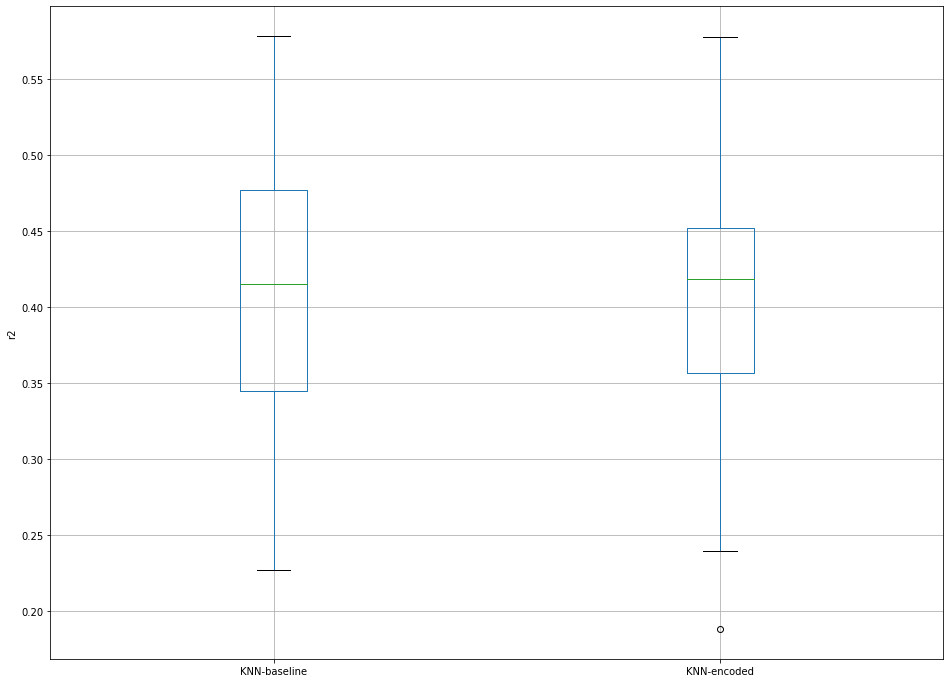

In [ ]:
# Write your code here for task 4
#https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
#https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643

from sklearn.neighbors import KNeighborsRegressor


results = {}

knn_model = KNeighborsRegressor(n_neighbors=3)

#fig, ax = plt.subplots(figsize=(12, 7))
# Without data scaling
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(knn_model, x_p4_old, y_p4, scoring='r2', cv=cv, n_jobs=-1)

results['KNN-baseline'] = scores

#categorical fature gula chara cv chalabo then results a dhukai rakhbo
#categorical fature shoho(encoding kore) cv chalabo then results a dhukai rakhbo

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(knn_model, x_p4, y_p4, scoring='r2', cv=cv, n_jobs=-1)

results['KNN-encoded'] = scores



# plotting
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot(figsize=(16,12)) 
boxplot.set_ylabel('r2')
plt.show()